In [1]:
# 라이브러리 설치
!pip install gdrive_dataset

from gdrivedataset import loader

file_id = "1vj0tPbM6f67xbvquYvtsQ5tyYbP9vQHw"
loader.load_from_google_drive(file_id)

========== files ============

data/소득예측경진대회



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [34]:
DATA_DIR = "./data/소득예측경진대회"
train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
submission = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))

In [19]:
train.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,2,309513,12,2,2,0,4,1,0,0,40,38,<=50K
1,1,33,2,205469,10,2,3,0,4,1,0,0,40,38,>50K
2,2,46,2,149949,10,2,2,0,4,1,0,0,40,38,<=50K
3,3,23,2,193090,13,4,0,3,4,0,0,0,30,38,<=50K
4,4,55,2,60193,9,0,0,1,4,0,0,0,40,38,<=50K


In [35]:
train = train.dropna(axis=0)
train.shape

(15081, 16)

In [36]:
train = train.drop(['education'], axis=1)
test = test.drop(['education'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cat_col_list = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
encoder = LabelEncoder()
for col in cat_col_list:
  train[col] = encoder.fit_transform(train[col])
  test[col] = encoder.transform(test[col])

In [38]:
train['target'] = encoder.fit_transform(train['target'])

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'target'],
      dtype='object')


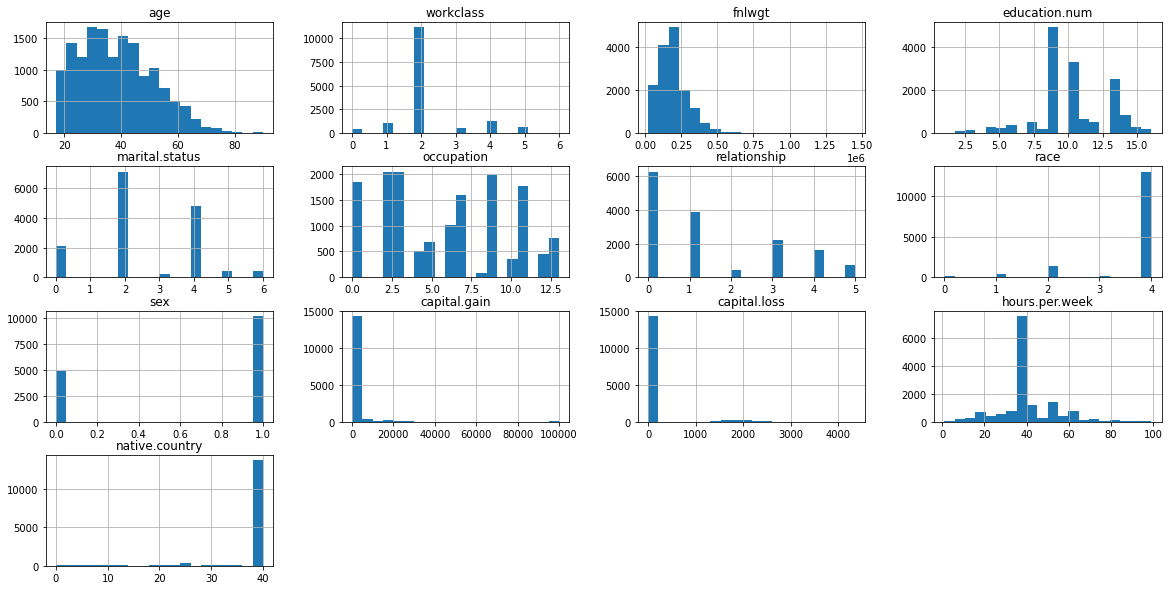

In [16]:
cols_list = train.columns[1:]
print(cols_list)

train[cols_list].hist(figsize=(20,10), grid=True, layout=(4,4), bins=20)
plt.show()

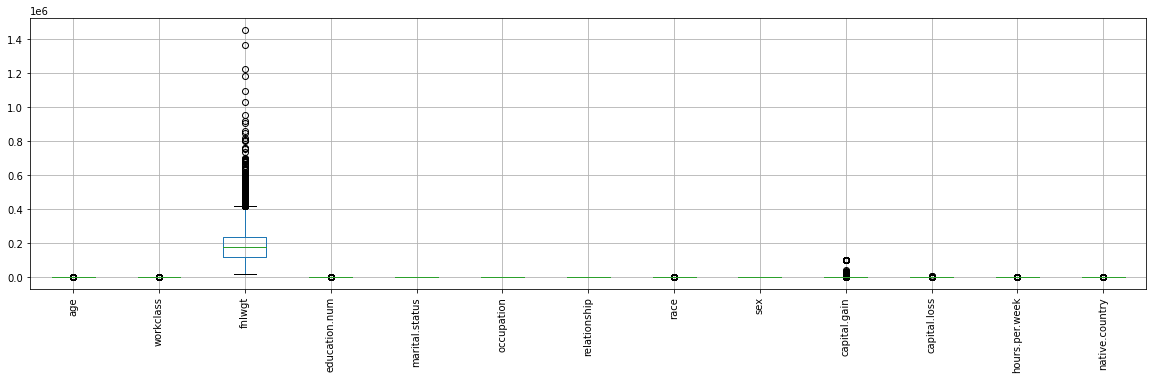

In [17]:
train[cols_list[:-1]].boxplot(rot=90, figsize=(20, 5))

In [39]:
x_train = train.drop(['id', 'target'], axis=1)
y_train = train[['target']]
x_test = test.drop(['id'], axis=1)

In [40]:
train.shape

(15081, 15)

In [41]:
test.shape

(15081, 14)

In [42]:
test.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,2,304133,10,2,3,0,4,1,0,0,45,38
1,1,34,3,154227,10,4,11,1,4,1,0,0,75,38
2,2,31,1,158291,13,4,2,1,4,1,8614,0,40,38
3,3,28,2,183155,13,2,9,0,4,1,0,0,55,38
4,4,54,1,182543,10,6,0,4,4,0,0,0,40,25


In [43]:
train.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,2,309513,12,2,2,0,4,1,0,0,40,38,0
1,1,33,2,205469,10,2,3,0,4,1,0,0,40,38,1
2,2,46,2,149949,10,2,2,0,4,1,0,0,40,38,0
3,3,23,2,193090,13,4,0,3,4,0,0,0,30,38,0
4,4,55,2,60193,9,0,0,1,4,0,0,0,40,38,0


In [44]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score

model = LGBMClassifier(random_state=23)

kfold = KFold(n_splits=5, shuffle=True)

cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f'CV mean: {cv_result.mean()*100:.6f} +-std: {cv_result.std():.6f}\n')


CV mean: 86.599060 +-std: 0.003007



In [45]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=23)

In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [49]:
submission['target'] = y_pred
submission.to_csv('submission3.csv', index=False)

In [ ]:
# 점수가 확 올랐다. 왜 올랐는지 분석해 봐야 할 것 같다.